# 01 - Data Generation

This notebook demonstrates the **Auxiliar** module for generating synthetic supply chain data.

## What we'll do:
1. Generate synthetic sales data with trend and seasonality
2. Explore the data structure
3. Visualize patterns
4. Save data for the next stage (Forecasting)

In [1]:
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from auxiliar.auxiliar import generate_data

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Imports successful!")

✅ Imports successful!


## 1. Generate Synthetic Data

We'll create data for:
- **3 stores** (A, B, C)
- **2 products** (A, B)
- **52 weeks** of historical data

In [2]:
# Generate data
data = generate_data(
    n_stores=3,
    n_products=2,
    n_weeks=52,
    start_date='2024-01-01',
    seed=42
)

print(f"Generated {len(data)} records")
print(f"\nData shape: {data.shape}")
print(f"\nColumns: {list(data.columns)}")
print(f"\nFirst few rows:")
data.head(10)

Generated 312 records

Data shape: (312, 7)

Columns: ['store', 'product', 'date', 'sales', 'inventory', 'customer_id', 'destination']

First few rows:


,store,product,date,sales,inventory,customer_id,destination
0,A,A,2024-01-07,115.896346,201.656635,CUST_2306,61663
1,A,A,2024-01-14,140.247001,444.638429,CUST_7776,25708
2,A,A,2024-01-21,122.980537,412.057203,CUST_6864,59811
3,A,A,2024-01-28,128.301355,418.702150,CUST_8526,12811
4,A,A,2024-02-04,156.273821,431.381104,CUST_9901,66250
5,A,A,2024-02-11,140.585349,222.213396,CUST_6575,82082
6,A,A,2024-02-18,115.481644,307.539719,CUST_6530,44754
7,A,A,2024-02-25,123.015605,234.760718,CUST_5413,21411
8,A,A,2024-03-03,101.375871,458.931028,CUST_4748,12911
9,A,A,2024-03-10,97.829390,386.989438,CUST_1663,77270


## 2. Explore the Data

In [3]:
# Summary statistics
print("📊 Summary Statistics:")
print(data[['sales', 'inventory']].describe())

print(f"\n📅 Date Range: {data['date'].min()} to {data['date'].max()}")
print(f"🏪 Stores: {sorted(data['store'].unique())}")
print(f"📦 Products: {sorted(data['product'].unique())}")

📊 Summary Statistics:
            sales   inventory
count  312.000000  312.000000
mean   152.786651  354.424671
std     57.253243   87.429309
min     35.786781  200.813270
25%    113.604214  277.970253
50%    151.153769  361.996605
75%    190.182812  431.573417
max    299.840336  498.749413

📅 Date Range: 2024-01-07 00:00:00 to 2024-12-29 00:00:00
🏪 Stores: ['A', 'B', 'C']
📦 Products: ['A', 'B']


## 3. Visualize Sales Patterns

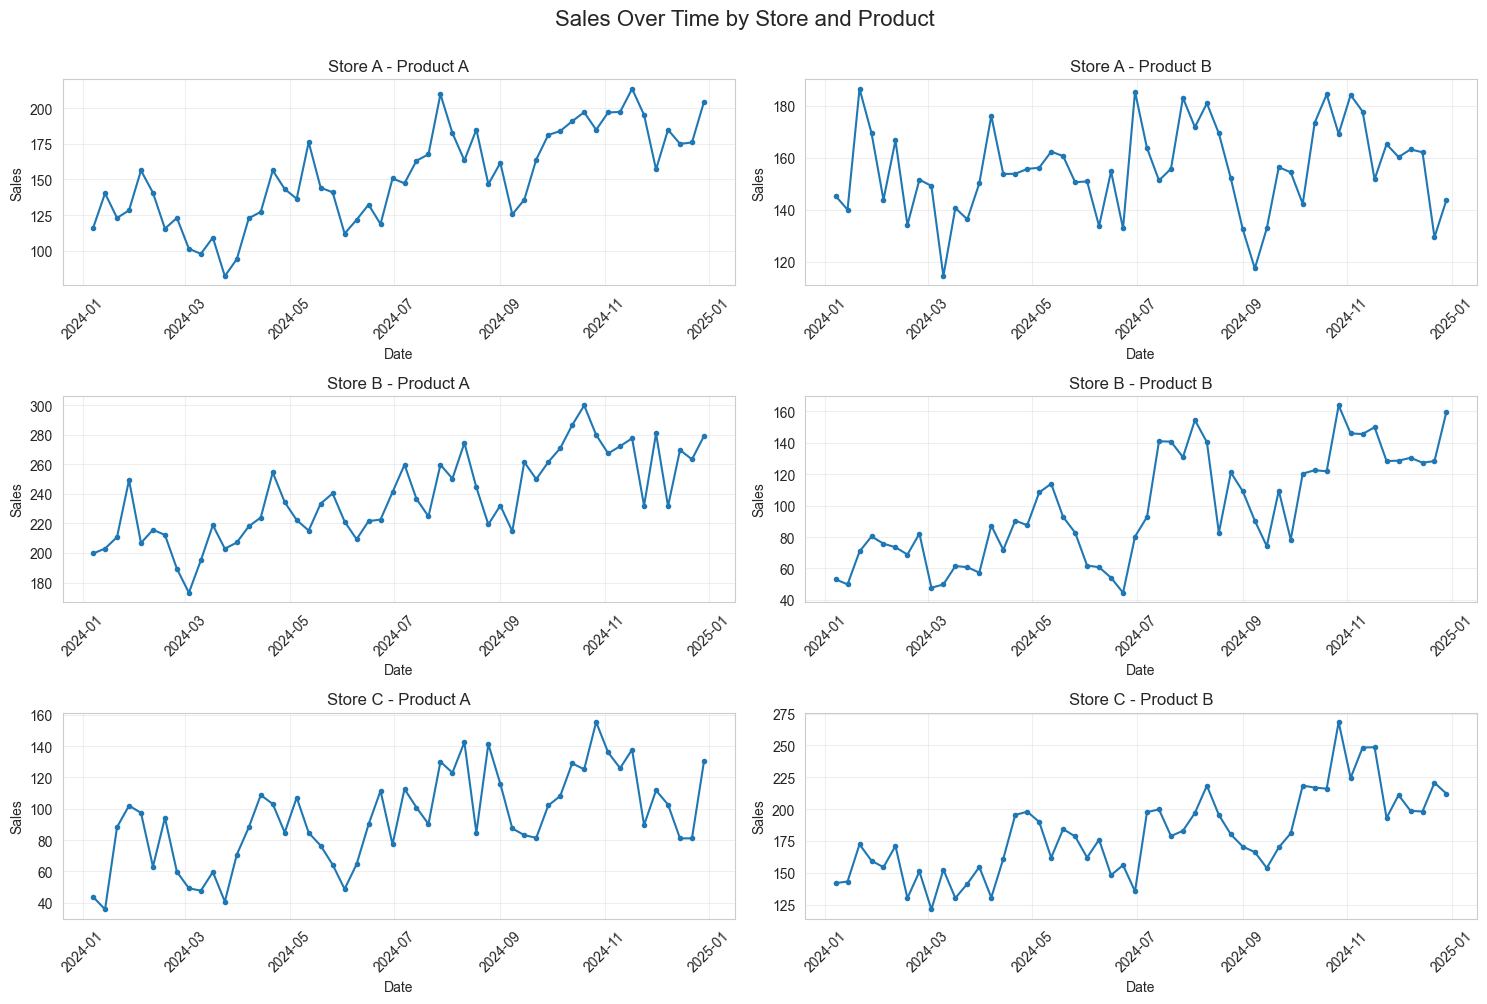

In [4]:
# Plot sales over time for each store-product combination
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Sales Over Time by Store and Product', fontsize=16, y=1.00)

stores = sorted(data['store'].unique())
products = sorted(data['product'].unique())

for i, store in enumerate(stores):
    for j, product in enumerate(products):
        ax = axes[i, j]
        subset = data[(data['store'] == store) & (data['product'] == product)]
        
        ax.plot(subset['date'], subset['sales'], marker='o', markersize=3, linewidth=1.5)
        ax.set_title(f'Store {store} - Product {product}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Sales')
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

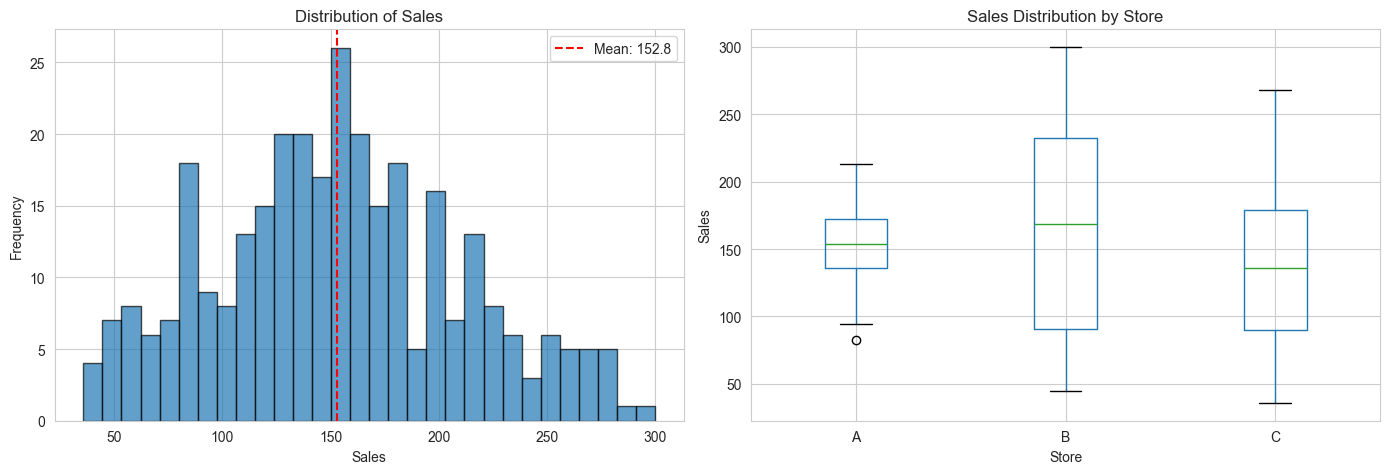

In [5]:
# Distribution of sales
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(data['sales'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Sales')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')
axes[0].axvline(data['sales'].mean(), color='red', linestyle='--', label=f'Mean: {data["sales"].mean():.1f}')
axes[0].legend()

# Box plot by store
data.boxplot(column='sales', by='store', ax=axes[1])
axes[1].set_title('Sales Distribution by Store')
axes[1].set_xlabel('Store')
axes[1].set_ylabel('Sales')

plt.suptitle('')
plt.tight_layout()
plt.show()

## 4. Save Data for Next Stage

We'll save this data to be used by the Forecaster module.

In [6]:
# Save to output folder
output_path = '../output/01_generated_data.csv'
data.to_csv(output_path, index=False)

print(f"✅ Data saved to: {output_path}")
print(f"📊 Total records: {len(data)}")
print(f"💾 File size: {pd.read_csv(output_path).memory_usage(deep=True).sum() / 1024:.1f} KB")

✅ Data saved to: ../output/01_generated_data.csv
📊 Total records: 312
💾 File size: 83.3 KB


## Summary

✅ Generated synthetic supply chain data with realistic patterns

✅ Explored data structure and statistics

✅ Visualized sales trends and distributions

✅ Saved data for forecasting

**Next:** Open `02_forecasting.ipynb` to forecast future demand!